In [1]:
import csv, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time_max = 200

df_apple = pd.read_csv('data/apple_prices.csv', names=['Price'], header=None)
apple = df_apple.Price.tolist()
apple = apple[:time_max]

In [3]:
# Returns an n period exponential moving average for the time series data
def ema(ls, n):
    
    ema = []
    time = 1

    # get the average of the first n data points
    head = sum(ls[:n])/n
    multiplier = 2/float(1 + n)
    ema.append(head)

    # EMA(current) = ((Price(current) - EMA(prev) ) x Multiplier) + EMA(prev)
    ema.append(((ls[n] - head) * multiplier) + head)

    # calculate the rest of the values
    for price in ls[n+1:]:
        tmp = ((price - ema[time]) * multiplier) + ema[time]
        time = time + 1
        ema.append(tmp)
    return ema

In [4]:
# Returns an n period weighted moving average for the time series data
def wma(ls, n):
    
    weights = []
    wma = []

    for i in range(0, n):
        w = (2 * (i + 1)/(n * (n + 1)))
        weights.append(w);
    
    for i in range(0, len(ls)-n):
        tmp = 0
        for j in range(0, n):
            tmp += ls[i+j] * weights[j]
        wma.append(tmp)
    
    return wma

In [5]:
# Returns the trading decisions based on the MACD signals
def dec(macd):
    
    decisions = [0]

    for i in range(1, len(macd)):
        if abs(macd[i]) < 0.1:
            if (macd[i] - macd[i-1]) > 0:
                decisions.append(1)
            elif (macd[i] - macd[i-1]) < 0:
                decisions.append(-1)
            else:
                decisions.append(0)
        else:
            decisions.append(0)
    
    return decisions

In [6]:
# Returns the trading decisions based on the MACD signals
def dec(macd):
    
    decisions = [0]

    for i in range(1, len(macd)):
        tmp = macd[i-1] * macd[i]
        if tmp <= 0:
            if (macd[i] - macd[i-1]) > 0:
                decisions.append(1)
            elif (macd[i] - macd[i-1]) < 0:
                decisions.append(-1)
            else:
                decisions.append(0)
        else:
            decisions.append(0)
    
    return decisions

# Returns the trading decisions based on the MACD signals
def dec_approx(macd):
    
    decisions = [0]

    for i in range(1, len(macd)):
        x = macd[i]
        x *= 0.6
        tmp = -0.061 + x/4 - x**2/5 + x**4/192 - x**6/2880 + (17*(x**8))/645120
        tmp *= (macd[i-1] - macd[i])
        decisions.append(tmp)
        
    return decisions

In [7]:
# ema12 = ema(apple, 12)
# ema26 = ema(apple, 26)

# ema12 = ema12[14:]
# ema_diff = [ema12_i - ema26_i for ema12_i, ema26_i in zip(ema12, ema26)]

# ema9 = ema(ema_diff, 9)

# ema_diff = ema_diff[8:]
# macd_ema = [ema_diff_i - ema9_i for ema_diff_i, ema9_i in zip(ema_diff, ema9)]

# decisions_ema = dec(macd_ema)
# decisions_ema_approx = dec_approx(macd_ema)

# apple = apple[33:]
# ema12 = ema12[8:]
# ema26 = ema26[8:]

In [8]:
# # Plot the exponential moving averages, apple stock prices and trading decisions
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (20, 20))
# x_range = np.arange(0, len(macd_ema), 1)
# x_range2 = np.arange(0, len(decisions_ema), 1)
# x, y = [0, len(macd_ema)], [0, 0]

# ax1.plot(apple, color='red', alpha=0.5, label='apple stock price')
# ax1.plot(ema12, color='blue', alpha=0.5, label='wma12')
# ax1.plot(ema26, color='green', alpha=0.5, label='wma26')
# ax1.set_title('Apple Stock Prices')
# ax1.legend()

# ax2.plot(x, y)
# ax2.bar(x_range, macd_ema, color='blue', alpha=0.5, label='macd')
# ax2.plot(ema9, color='red', alpha=0.5, label='wma9(wma12-wma26)')
# ax2.plot(ema_diff, color='green', alpha=0.5, label='wma12-wma26')
# ax2.set_title('MACD Signal')
# ax2.legend()

# ax3.bar(x_range2, decisions_ema_approx, color='orange', alpha=0.5, label='decisions')
# ax3.plot(x, y)
# ax3.set_title('Approximate Trading Decisions')
# ax3.legend()

# ax4.bar(x_range2, decisions_ema, color='orange', alpha=0.5, label='decisions')
# ax4.plot(x, y)
# ax4.set_title('Trading Decisions')
# ax4.legend()

# plt.show()

In [9]:
apple = df_apple.Price.tolist()
apple = apple[:time_max]

wma12 = wma(apple, 12)
wma26 = wma(apple, 26)

wma12 = wma12[14:]
wma_diff = [wma12_i - wma26_i for wma12_i, wma26_i in zip(wma12, wma26)]

wma9 = wma(wma_diff, 9)

wma_diff = wma_diff[8:]
macd_wma = [wma_diff_i - wma9_i for wma_diff_i, wma9_i in zip(wma_diff, wma9)]

decisions_wma = dec(macd_wma)
decisions_wma_approx = dec_approx(macd_wma)

apple = apple[35:]
wma12 = wma12[9:]
wma26 = wma26[9:]

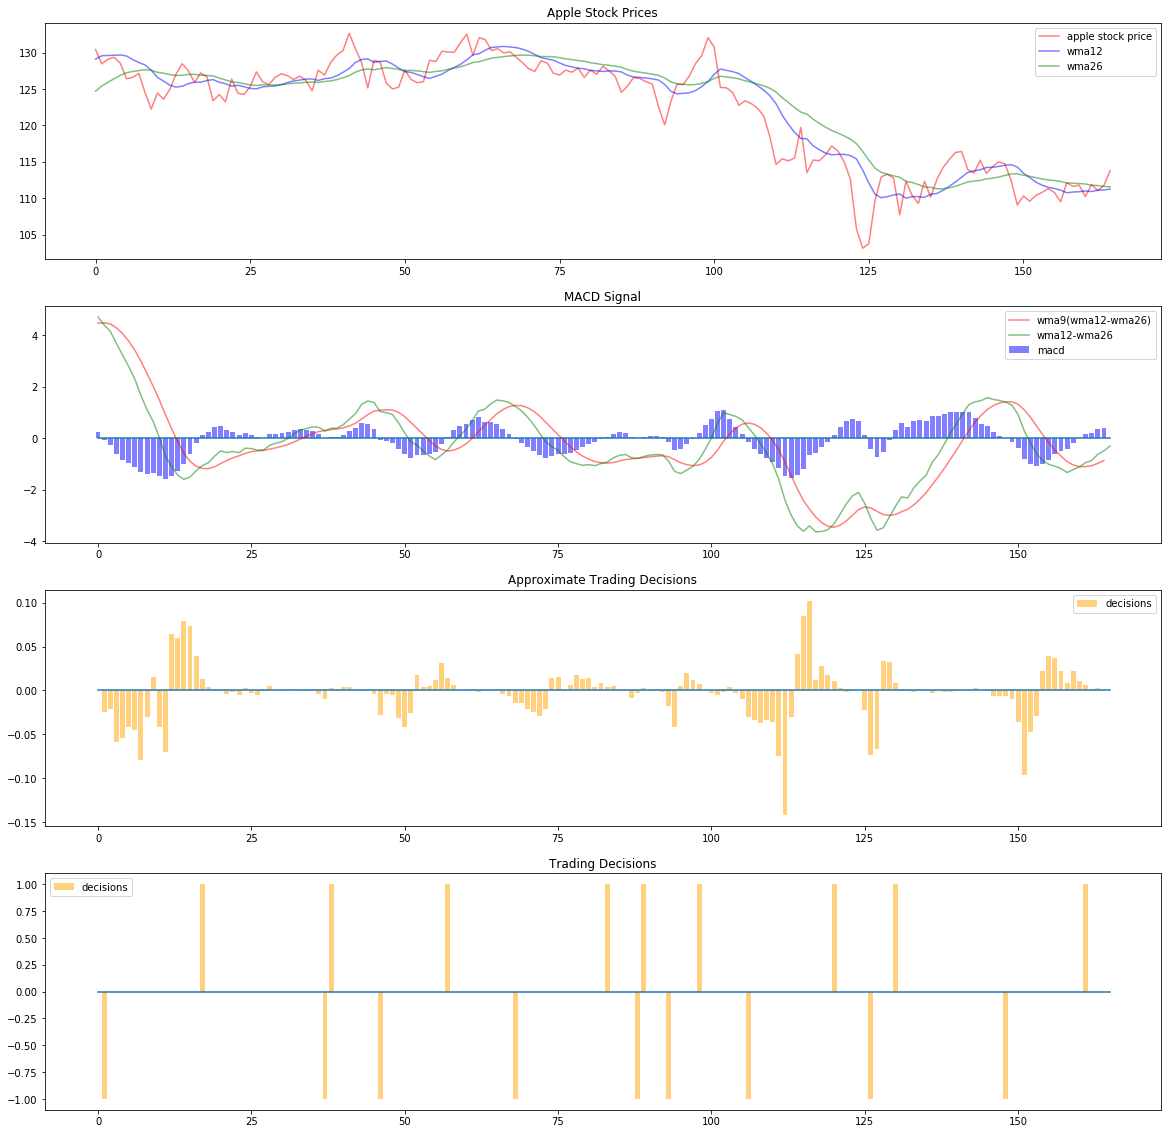

In [10]:
# Plot the weighted moving averages, apple stock prices and trading decisions
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (20, 20))
x_range = np.arange(0, len(macd_wma), 1)
x_range2 = np.arange(0, len(decisions_wma), 1)
x, y = [0, len(macd_wma)], [0, 0]

ax1.plot(apple, color='red', alpha=0.5, label='apple stock price')
ax1.plot(wma12, color='blue', alpha=0.5, label='wma12')
ax1.plot(wma26, color='green', alpha=0.5, label='wma26')
ax1.set_title('Apple Stock Prices')
ax1.legend()

ax2.plot(x, y)
ax2.bar(x_range, macd_wma, color='blue', alpha=0.5, label='macd')
ax2.plot(wma9, color='red', alpha=0.5, label='wma9(wma12-wma26)')
ax2.plot(wma_diff, color='green', alpha=0.5, label='wma12-wma26')
ax2.set_title('MACD Signal')
ax2.legend()

ax3.bar(x_range2, decisions_wma_approx, color='orange', alpha=0.5, label='decisions')
ax3.plot(x, y)
ax3.set_title('Approximate Trading Decisions')
ax3.legend()

ax4.bar(x_range2, decisions_wma, color='orange', alpha=0.5, label='decisions')
ax4.plot(x, y)
ax4.set_title('Trading Decisions')
ax4.legend()

plt.show()